In [1]:
# import dependencies
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# preprocessing data
from mnist import MNIST

mndata = MNIST(path='dataset',gz=True)
train_img, train_labels = mndata.load_training()
test_img, test_lables = mndata.load_testing()

In [3]:
len(train_img)

60000

In [4]:
train_img = tf.reshape(train_img,shape=(60000,28,28,1))
test_img = tf.reshape(test_img,shape=(10000,28,28,1))
train_labels = tf.reshape(train_labels,shape=(60000))
test_lables = tf.reshape(test_lables,shape=(10000))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-14 16:25:56.821802: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-14 16:25:56.821932: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


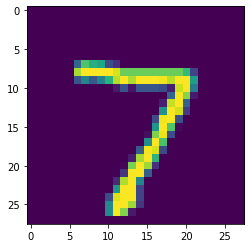

In [5]:
plt.imshow(test_img[0])
train_img = tf.cast(train_img,tf.float32)
test_img = tf.cast(test_img,tf.float32)
train_img = train_img/255.
test_img  = test_img/225.

In [6]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten
import tensorflow_hub as hub
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [7]:
import datetime as dt

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + "/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving log files to {log_dir}")
  return tensorboard_callback

In [8]:
model_1 = Sequential([
  Conv2D(10,3,input_shape=(28,28,1) ,activation='relu',name='input_layer'),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(pool_size=2),

  Conv2D(10,3,activation='relu'),
  MaxPool2D(pool_size=2),

  Flatten(),
  Dense(20,activation='relu'),
  Dense(10,activation='softmax',name='output_layer')
])
model_1.compile(loss=SparseCategoricalCrossentropy(),optimizer=Adam(), metrics=['accuracy'])

In [9]:
model_1.fit(x=train_img,y=train_labels,validation_data=(test_img,test_lables),epochs=10,callbacks=[create_tensorboard_callback('hub','model_1-with-10-filters-conv-layers')])

Saving log files to hub/model_1-with-10-filters-conv-layers/20220714-162558
Epoch 1/10


2022-07-14 16:25:58.405804: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-14 16:25:58.628372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1873/1875 [============================>.] - ETA: 0s - loss: 0.2792 - accuracy: 0.9120

2022-07-14 16:26:15.714518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 19s 10ms/step - loss: 0.2790 - accuracy: 0.9121 - val_loss: 0.0744 - val_accuracy: 0.9768
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0816 - accuracy: 0.9751 - val_loss: 0.0890 - val_accuracy: 0.9730
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0606 - accuracy: 0.9813 - val_loss: 0.0522 - val_accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0507 - accuracy: 0.9842 - val_loss: 0.0358 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0426 - accuracy: 0.9865 - val_loss: 0.0347 - val_accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0374 - accuracy: 0.9882 - val_loss: 0.0415 - val_accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0334 - accuracy: 0.9898 - val_loss: 0.0383 - val_accuracy: 0.

In [10]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Conv2D)        (None, 26, 26, 10)        100       
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 250)               0

In [11]:
model_2 = Sequential([
  Conv2D(32,3,input_shape=(28,28,1) ,activation='relu',name='input_layer'),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(pool_size=2),

  Conv2D(10,3,activation='relu'),
  MaxPool2D(pool_size=2),

  Flatten(),
  Dense(20,activation='relu'),
  Dense(10,activation='softmax',name='output_layer')
])
model_2.compile(loss=SparseCategoricalCrossentropy(),optimizer=Adam(), metrics=['accuracy'])
model_2.fit(x=train_img,y=train_labels,validation_data=(test_img,test_lables),epochs=10,callbacks=[create_tensorboard_callback('hub','model_2-with-32-filters-conv-layers')])

Saving log files to hub/model_2-with-32-filters-conv-layers/20220714-162845
Epoch 1/10
   1/1875 [..............................] - ETA: 11:23 - loss: 2.3112 - accuracy: 0.0312

2022-07-14 16:28:45.941604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1869/1875 [============================>.] - ETA: 0s - loss: 0.2525 - accuracy: 0.9195

2022-07-14 16:29:02.939635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 19s 10ms/step - loss: 0.2519 - accuracy: 0.9197 - val_loss: 0.0900 - val_accuracy: 0.9720
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0802 - accuracy: 0.9758 - val_loss: 0.0618 - val_accuracy: 0.9802
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0601 - accuracy: 0.9814 - val_loss: 0.0514 - val_accuracy: 0.9847
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0503 - accuracy: 0.9845 - val_loss: 0.0525 - val_accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0447 - accuracy: 0.9861 - val_loss: 0.0475 - val_accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 0.0407 - val_accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0350 - accuracy: 0.9893 - val_loss: 0.0387 - val_accuracy: 

In [12]:
import tensorboard

In [70]:
import random
def show_predition_with_random_img(model):
    # pred_set = tf.expand_dims(pred_set,axis=0)
    random_range = random.randrange(0,len(test_img))
    real = test_lables[random_range]
    print('real-label',real)
    pred_set = test_img[random_range]
    plt.imshow(pred_set)
    y_prods = model.predict(tf.expand_dims(pred_set,axis=0))
    print(y_prods)
    y_pred = y_prods[0].argmax()
    plt.imshow(pred_set)
    return y_pred

real-label tf.Tensor(8, shape=(), dtype=int32)
1/1 [==============================] - 0s 11ms/step
[[7.7483229e-02 2.8075784e-19 8.3598882e-15 1.8518220e-05 8.1963630e-11
  2.9136243e-04 1.1123742e-02 2.8835746e-15 9.1105658e-01 2.6526357e-05]]


8

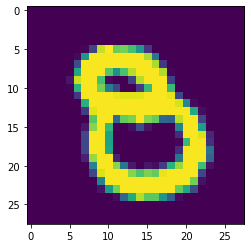

In [134]:
show_predition_with_random_img(model=model_4)

313/313 [==============================] - 1s 2ms/step


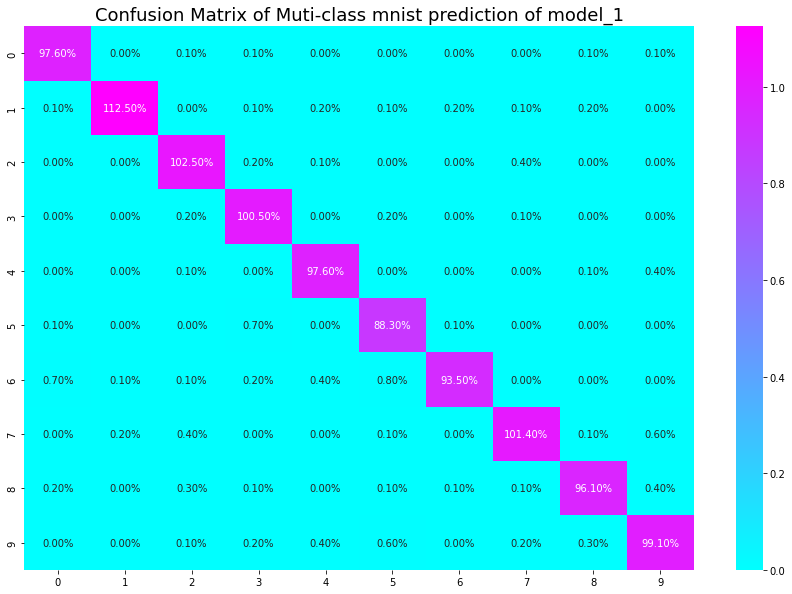

<Figure size 432x288 with 0 Axes>

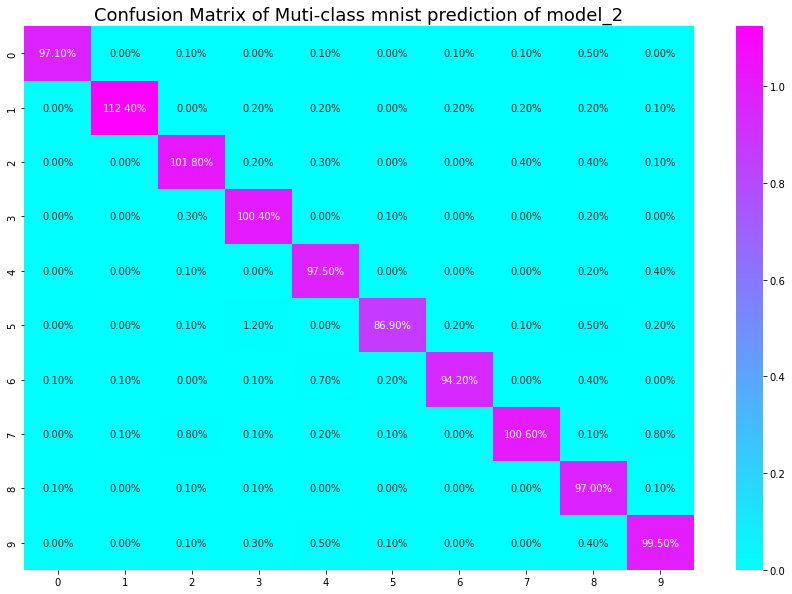

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def create_confusion_map(model,name):
    y_prods = model.predict(test_img)
    y_preds = y_prods.argmax(axis=1)

    cm = confusion_matrix(test_lables, y_preds)

    classes = [0,1,2,3,4,5,6,7,8,9]

    fig, ax = plt.subplots(figsize=(15,10))
    # Add title to the Heat map
    title = f"Confusion Matrix of Muti-class mnist prediction of {name}"

    # Set the font size and the distance of the title from the plot
    plt.title(title,fontsize=18)
    ttl = ax.title
    ttl.set_position([0.5,1.05])

    datasets = pd.DataFrame(cm/1000,index=classes, columns=classes)
    sns.heatmap(datasets,ax=ax, cmap="cool",fmt=".2%", annot=True)
create_confusion_map(model_1,"model_1")
plt.figure()
create_confusion_map(model_2,"model_2")

In [57]:
from tensorflow.keras.callbacks import EarlyStopping
model_4 = tf.keras.models.clone_model(model_1)
model_4.compile(loss=SparseCategoricalCrossentropy(),optimizer=Adam(), metrics=['accuracy'])
model_4.fit(x=train_img,y=train_labels,validation_data=(test_img,test_lables),epochs=30,callbacks=[create_tensorboard_callback('hub','model4-early-stopping'),EarlyStopping(patience=3)])

Saving log files to hub/model4-early-stopping/20220714-170443
Epoch 1/30


2022-07-14 17:04:43.646071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1870/1875 [============================>.] - ETA: 0s - loss: 0.2600 - accuracy: 0.9193

2022-07-14 17:04:59.482311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 17s 9ms/step - loss: 0.2597 - accuracy: 0.9193 - val_loss: 0.0960 - val_accuracy: 0.9700
Epoch 2/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0824 - accuracy: 0.9744 - val_loss: 0.0658 - val_accuracy: 0.9794
Epoch 3/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0627 - accuracy: 0.9809 - val_loss: 0.0529 - val_accuracy: 0.9829
Epoch 4/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0512 - accuracy: 0.9843 - val_loss: 0.0519 - val_accuracy: 0.9818
Epoch 5/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0449 - accuracy: 0.9861 - val_loss: 0.0416 - val_accuracy: 0.9867
Epoch 6/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0400 - accuracy: 0.9873 - val_loss: 0.0348 - val_accuracy: 0.9876
Epoch 7/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0366 - accuracy: 0.9881 - val_loss: 0.0367 - val_accuracy: 0.9

 70/313 [=====>........................] - ETA: 0s

2022-07-14 17:09:53.899987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


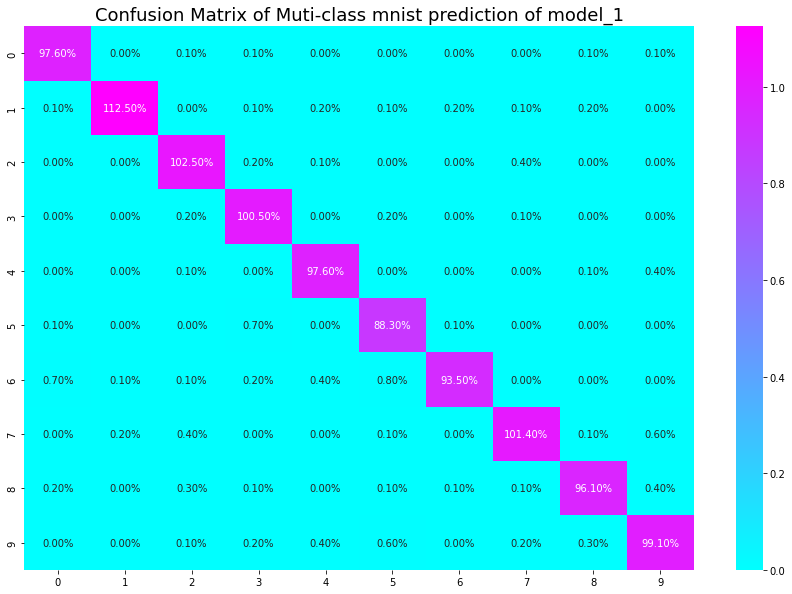

<Figure size 432x288 with 0 Axes>

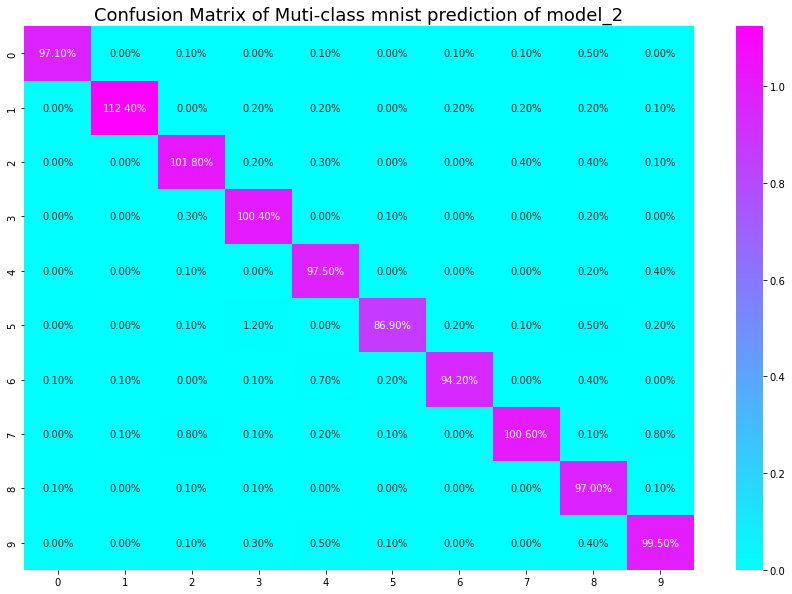

<Figure size 432x288 with 0 Axes>

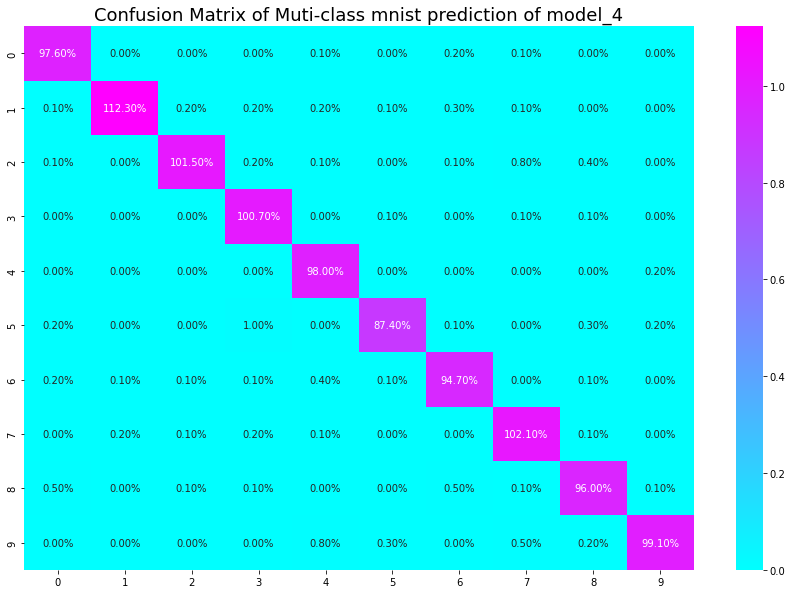

In [58]:
create_confusion_map(model_1,"model_1")
plt.figure()
create_confusion_map(model_2,"model_2")
plt.figure()
create_confusion_map(model_4,"model_4")

In [135]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Conv2D)        (None, 26, 26, 10)        100       
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 250)               0

In [136]:
model_4.save('model_4.h5')